### 載入整理資料

In [1]:
from keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

Using TensorFlow backend.


### 一個隱藏層

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #調整優化器
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=[metrics.binary_accuracy])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.5092 - acc: 0.7907 - val_loss: 0.4033 - val_acc: 0.8604
Epoch 2/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.3251 - acc: 0.9003 - val_loss: 0.3351 - val_acc: 0.8751
Epoch 3/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.2524 - acc: 0.9231 - val_loss: 0.2952 - val_acc: 0.8870
Epoch 4/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.2082 - acc: 0.9374 - val_loss: 0.2814 - val_acc: 0.8884
Epoch 5/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1766 - acc: 0.9471 - val_loss: 0.2766 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1511 - acc: 0.9558 - val_loss: 0.2748 - val_acc: 0.8880
Epoch 7/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.1323 - acc: 0.9612 - val_loss: 0.2784 - val_acc

### 顯示結果

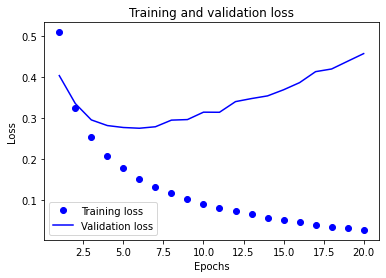

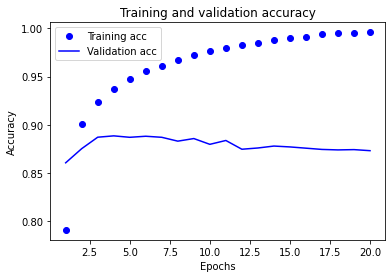

25000/25000 [==============================] - 3s 118us/step
[0.4917125586271286, 0.8588399887084961]


array([[0.05764487],
       [0.99998724],
       [0.8793608 ],
       ...,
       [0.01765409],
       [0.03988566],
       [0.8428408 ]], dtype=float32)

In [8]:
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估

print(results)

model.predict(x_test)